In [29]:
# f(x) = (x ** 2 + 3) / (3 * (x + 1))
# 1. Определить корни
# 2. Найти интервалы, на которых функция возрастает
# 3. Найти интервалы, на которых функция убывает
# 4. Построить график
# 5. Вычислить вершину
# 6. Определить промежутки, на котором f > 0
# 7. Определить промежутки, на котором f < 0

In [30]:
# 1. Представление функции
from sympy import *
from sympy.plotting import plot

x = Symbol ("x")
f = (x ** 2 + 3) / (3 * (x + 1))
f

(x**2 + 3)/(3*x + 3)

In [39]:
# 2. Находим нули функции
print('Нули функции равны:')
roots = solve(f, x) #решения в формате Python
roots = solveset (f, x, S.Reals) #решения в символьном формате
roots

Нули функции равны:


EmptySet

In [32]:
# Определяем интервалы, где функция возрастает и убывает ('Экстремумы')
extremum_list = [-oo, oo]
extremum_list[1:1] = solve(diff(f), x)
extremum_list

[-oo, -3, 1, oo]

In [40]:
# 3. Определяем интревалы возрастания и убывания (по методу семинара)

f_diff = [-oo, oo]
f_diff[1:1] = solve(diff(f), x)

incr_list = []
decr_list = []

for i in range(1, len(f_diff)):
    val = is_increasing(f, Interval.open(f_diff[i - 1], f_diff[i]))
    if val:
        incr_list.append(f"[{(f_diff[i - 1]).evalf(2)}, {(f_diff[i]).evalf(2)}]")
    else:
        decr_list.append(f"[{(f_diff[i - 1]).evalf(2)}, {(f_diff[i]).evalf(2)}]")

print(f"Убывает на интервалах:", *decr_list, sep="\n")
print(f"Возрастает на интервалах:", *incr_list, sep="\n")

Убывает на интервалах:
[-3.0, 1.0]
Возрастает на интервалах:
[-oo, -3.0]
[1.0, oo]


In [33]:
# 3. Определяем интревалы возрастания и убывания (добавил переменные для вычиления интервалов знакопостоянства)
increas_intervals =[]
decreas_intervals = []
check_inc=0
check_dec=0
for i in range (1,len(extremum_list)):
    temp = is_increasing(f, Interval.open(extremum_list[i-1], extremum_list[i]))
    if temp:
        increas_intervals.append(f'{extremum_list[i-1]},{extremum_list[i]}')
    else:
        decreas_intervals.append(f'{extremum_list[i-1]},{extremum_list[i]}')
if len(increas_intervals)>0:
    print('Функция возрастает на следующих интервалах:')
    for i in range (len(increas_intervals)):
        print (f'({increas_intervals[i]})', end = " ")
        check_inc+=1
    print(f'\n')
else:
    print('Интервалы возрастания отсутствуют')
if len(decreas_intervals)>0:
    print('Функция убываает на следующих интервалах:')
    for i in range (len(decreas_intervals)):
        print (f'({decreas_intervals[i]})', end = " ")
        check_dec+=1
else:
    print('Интервалы убывания отсутствуют')

Функция возрастает на следующих интервалах:
(-oo,-3) (1,oo) 

Функция убываает на следующих интервалах:
(-3,1) 

In [34]:
# Находим область определения функции (вертикальная асимптота)
f_0 = 3 * (x + 1)
not_sol = solveset(f_0, x)
not_sol

{-1}

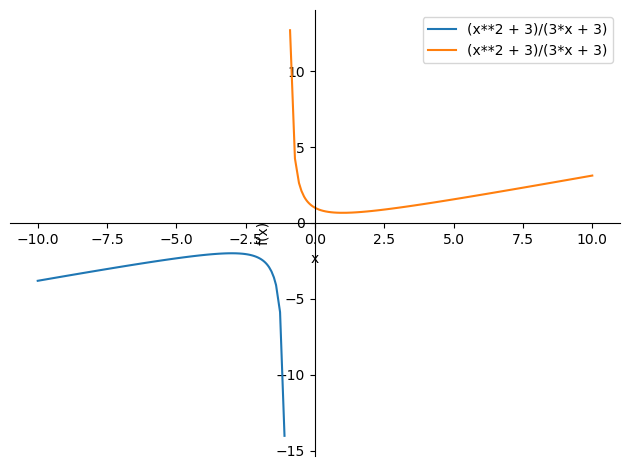

In [35]:
# 4. Строим график
plot((f, (x,-10, -1.1)), (f, (x, -0.9, 10)), legend = True)

In [44]:
# 5. Ищем экстремумы по методу семинара (сходится с Матвеем)
extr = solve(diff(f), x)
count_min = 1
count_max = 1
for i in extr:
    temp = f.subs(x, i).evalf(2)
    if temp < 0:
        print (f"Минимум {count_min} =", temp)
        count_min+=1
    elif temp >0:
        print (f"Максимум {count_max} =", temp)
        count_max+=1   

Минимум 1 = -2.0
Максимум 1 = 0.67


In [45]:
# 5. Ищем экстремумы (немного изменил код семинара)
extr = solve(diff(f), x)
count_min = 1
count_max = 1
if len(extr) == 0 or (check_inc==0 or check_dec==0):
    print (f"Максимумы и минимумы отсутствуют!")
elif len(extr) == 1:
    temp_1 = f.subs(x, extr[0]+4)
    temp_2 = f.subs(x, extr[0])
    if temp_2 < temp_1:
        print (f"Минимум {count_min}: x = {extr[0].evalf(2)}, y = {temp_2.evalf(2)}")     
    else:
        print (f"Максимум {count_min}: x = {extr[0].evalf(2)}, y = {temp_2.evalf(2)}")
else:
    temp_1 = f.subs(x, extr[1])
    for i in extr:
        temp_2 = f.subs(x, i)
        if temp_2 < temp_1:
            print (f"Минимум {count_min}: x = {i.evalf(2)}, y = {temp_2.evalf(2)}")
            count_min+=1
            temp_1 = temp_2
        elif temp_2 > temp_1:
            print (f"Максимум {count_max}: x = {i.evalf(2)}, y = {temp_2.evalf(2)}")
            count_max+=1
            temp_1 = temp_2

Минимум 1: x = -3.0, y = -2.0
Максимум 1: x = 1.0, y = 0.67


In [46]:
# Ищем интервал знакопостоянства функции, по методу семинара (некорректная работа)
interval_list = [-oo, oo]
interval_list[1:1] = solve(f, x)
increas =[]
decreas = []
for i in range (1,len(interval_list)):
    temp_1, temp_2 = interval_list[i-1], interval_list[i]
    temp = is_increasing(f, Interval.open(temp_1, temp_2))
    if temp:
        increas.append(f'{temp_1},{temp_2}')
    else:
        decreas.append(f'{temp_1},{temp_2}')
print('Функция больше 0 на интервалах:', *increas, sep ='\n')
print('Функция меньше 0 на интервалах:', *decreas, sep ='\n')

ValueError: Non-real intervals are not supported

In [47]:
# 6. Ищем интервал знакопостоянства функции, мой метод (здесь работает)
root_f = [-oo, oo]
root_f[1:1] = (solve(f, x))
print (root_f)
pos_list = []
neg_list = []

for i in range(1, len(root_f)):
    if root_f[i-1] == -oo:
        num_1 = root_f[i]-1
        num_2 = root_f[i]
    elif root_f[i] == oo:
        num_1 = root_f[i-1]
        num_2 = root_f[i-1]+1
    else:
        num_1 = root_f[i-1]
        num_2 = root_f[i]
    sred = (num_1+num_2)/2
    ask_pos = f.subs(x,sred)
    num_1 = root_f[i-1]
    num_2 = root_f[i]
    if ask(Q.positive(ask_pos)):
        pos_list.append(f"[{num_1}, {num_2}]")
    else:
        neg_list.append(f"[{num_1}, {num_2}]")

print('Функция больше 0 на интервалах:', *pos_list, sep ='\n')
print('Функция меньше 0 на интервалах:', *neg_list, sep ='\n')

[-oo, -sqrt(3)*I, sqrt(3)*I, oo]
Функция больше 0 на интервалах:
[-sqrt(3)*I, sqrt(3)*I]
Функция меньше 0 на интервалах:
[-oo, -sqrt(3)*I]
[sqrt(3)*I, oo]


In [48]:
# 6. Ищем интервал знакопостоянства функции (правильный метод) y<0
print('Функция меньше 0:', end="")
solveset(f<0,x,Reals).evalf(2)

Функция меньше 0:

Interval.open(-oo, -1.0)

In [49]:
# 6. Ищем интервал знакопостоянства функции (правильный метод) y>0
print('Функция больше 0:', end="")
solveset(f>0,x,Reals).evalf(2)

Функция больше 0:

Interval.open(-1.0, oo)